# Verification Example Notebook

This Notebook will show how to use the verification script by providing a few examples in order of increasing difficulty. Before you start I highly suggest at least skimming [README.md](https://github.com/OpenPrecincts/verification/blob/master/README.md)

In [1]:
import geopandas as gpd
import verify

/Users/bdemers/miniconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


## Example #1 - The best case scenario

In [2]:
gdf = gpd.read_file('example-election-shapefiles/open-precincts-md-2016')
print(gdf.plot())
gdf.head(2)

AxesSubplot(0.125,0.222475;0.775x0.545051)


,JURIS,NAME,NUMBER,preid,G16RPRS,G16DPRS,G16PRELJoh,G16PREGSte,G16PREOth,G16USSRSze,...,G16H07RVau,G16H07DCum,G16H07GHoe,G16H07Oth,G16H08RCox,G16H08DRas,G16H08LWun,G16H08GWal,G16H08Oth,geometry
0,ALLE,ALLEGANY PRECINCT 01-000,01-000,ALLE-01-000,420,63,7,2,8,367,...,0,0,0,0,0,0,0,0,0,"POLYGON ((279387.444 229180.231, 279432.538 22..."
1,ALLE,ALLEGANY PRECINCT 02-000,02-000,ALLE-02-000,457,78,18,9,2,400,...,0,0,0,0,0,0,0,0,0,"POLYGON ((262891.921 216881.387, 263013.601 21..."


Great - our election shapefile looks good because it has:
* election results at a precinct level with vote counts 
    * for Clinton (G16DPRS)
    * and Trump (G16DPRS)
* AND geometries for each precinct (geometry)

We need all the bullets above in order to use the verification script. Next we will apply verify.verify_state. It's docstring is as follows:

```
returns a complete (StateReport) object and a ((CountyReport) list) for the state.

:state_prec_gdf: (GeoDataFrame) containing precinct geometries and election results
:state_abbreviation: (str) e.g. 'MA' for Massachusetts
:source: (str) person or organization that made the 'state_prec_gdf' e.g 'VEST'
:year: (str) 'YYYY' indicating the year the election took place e.g. '2016'
:d_col: (str) denotes the column for Hillary Clinton vote counts in each precinct
:r_col: (str) denotes the column for Donald Trump vote counts in each precinct
:path: (str) filepath to which the report should be saved (if None it won't be saved)

d_col, r_col are optional - if they are not provided, 'get_party_cols' will be used
to guess based on comparing each column in state_prec_gdf to the expected results.
```

Pro tip: If you want to view a docstring in Jupyter Notebooks just type hit `shift-tab` after the name of the function for which you want to see the docstring. 

In [3]:
state_report, county_report_lst = verify.verify_state(gdf, 'MD', 'OP', '2016')

d_col :  G16DPRS
r_col :  G16RPRS
GerryChain graph created


It's normal for the cell above this one to take a while - normally a few minutes, but even hours in extreme cases. It  depends on the complexity of the state shapefile.

Now that it's finished, let's inspect the reports it returned.

In [4]:
vars(state_report)

{'abbreviation': 'MD',
 'all_precincts_have_a_geometry': True,
 'can_use_gerrychain': True,
 'can_use_maup': True,
 'county_vote_score_dispersion': 0.0,
 'fips': '24',
 'median_county_area_difference_score': 0.03006844281656984,
 'n_two_party_votes_expected': 2621097.0,
 'n_two_party_votes_observed': 2621097,
 'n_votes_democrat_expected': 1677928.0,
 'n_votes_democrat_observed': 1677928,
 'n_votes_republican_expected': 943169.0,
 'n_votes_republican_observed': 943169,
 'name': 'Maryland',
 'source': 'OP',
 'vote_score': 1.0,
 'worst_county_area_difference_score': 0.2299505502474189,
 'worst_county_vote_score': 1.0,
 'year': '2016'}

In [5]:
vars(county_report_lst[0])

{'area_difference_score': 0.0031263336157248177,
 'geoid': '24001',
 'n_two_party_votes_expected': 29145.0,
 'n_two_party_votes_observed': 29145,
 'n_votes_democrat_expected': 7875.0,
 'n_votes_democrat_observed': 7875,
 'n_votes_republican_expected': 21270.0,
 'n_votes_republican_observed': 21270,
 'name': 'Allegany County',
 'vote_score': 1.0}

In [6]:
len(county_report_lst)

24

Great - now let's use these report objects to render a markdown file. You can also do this with verify.verify_state by providing the optional arguement `path` 

In [7]:
report_file_path = 'open-precincts-maryland-2016'
verify.make_report(report_file_path, state_report, county_report_lst)

In [8]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

Here is are the contents of open-precincts-maryland-2016.md:


# Election Shapefile Verification Report

[Open Precincts Verification Script](https://github.com/OpenPrecincts/verification)

[Verification Report Breakdown](https://github.com/OpenPrecincts/verification#verification-report-fields)
## Statewide Reports

### Quality Scores:
|                                                                                                            |           |
|:-----------------------------------------------------------------------------------------------------------|----------:|
| [vote_score](https://github.com/OpenPrecincts/verification#vote-score)                                     | 1         |
| [county_vote_score_dispersion](https://github.com/OpenPrecincts/verification#county-vote-score-dispersion) | 0         |
| [vote_score](https://github.com/OpenPrecincts/verification#vote-score)                                     | 1         |
| [median_county_area_difference_score](https://github.com/OpenPrecincts/verification#area-difference-score) | 0.0300684 |
| [worst_county_area_difference_score](https://github.com/OpenPrecincts/verification#area-difference-score)  | 0.229951  |

### Library Compatibility:
|                    |    |
|:-------------------|---:|
| can_use_maup       |  ✅ |
| can_use_gerrychain |  ✅ |

### Raw Data:
|                               |           |
|:------------------------------|:----------|
| all_precincts_have_a_geometry | ✅        |
| n_votes_democrat_expected     | 1677928.0 |
| n_votes_republican_expected   | 943169.0  |
| n_two_party_votes_expected    | 2621097.0 |
| n_votes_democrat_observed     | 1677928   |
| n_votes_republican_observed   | 943169    |
| n_two_party_votes_observed    | 2621097   |

## County Level Reports
|   geoid | name                   |   vote_score |   area_difference_score |   n_votes_democrat_expected |   n_votes_republican_expected |   n_two_party_votes_expected |   n_votes_democrat_observed |   n_votes_republican_observed |   n_two_party_votes_observed |
|--------:|:-----------------------|-------------:|------------------------:|----------------------------:|------------------------------:|-----------------------------:|----------------------------:|------------------------------:|-----------------------------:|
|   24001 | Allegany County        |            1 |              0.00312633 |                        7875 |                         21270 |                        29145 |                        7875 |                         21270 |                        29145 |
|   24003 | Anne Arundel County    |            1 |              0.0852648  |                      128419 |                        122403 |                       250822 |                      128419 |                        122403 |                       250822 |
|   24510 | Baltimore city         |            1 |              0.0624491  |                      202673 |                         25205 |                       227878 |                      202673 |                         25205 |                       227878 |
|   24005 | Baltimore County       |            1 |              0.0259037  |                      218412 |                        149477 |                       367889 |                      218412 |                        149477 |                       367889 |
|   24009 | Calvert County         |            1 |              0.11044    |                       18225 |                         26176 |                        44401 |                       18225 |                         26176 |                        44401 |
|   24011 | Caroline County        |            1 |              0.00157089 |                        4009 |                          9368 |                        13377 |                        4009 |                          9368 |                        13377 |
|   24013 | Carroll County         |            1 |              0.00377215 |                       26567 |                         58215 |                        84782 |                       26567 |                         58215 |                        84782 |
|   24015 | Cecil County           |            1 |              0.0792286  |                       13650 |                         28868 |                        42518 |                       13650 |                         28868 |                        42518 |
|   24017 | Charles County         |            1 |              0.0537216  |                       49341 |                         25614 |                        74955 |                       49341 |                         25614 |                        74955 |
|   24019 | Dorchester County      |            1 |              0.0488164  |                        6245 |                          8413 |                        14658 |                        6245 |                          8413 |                        14658 |
|   24021 | Frederick County       |            1 |              0.0024901  |                       56522 |                         59522 |                       116044 |                       56522 |                         59522 |                       116044 |
|   24023 | Garrett County         |            1 |              0.00147298 |                        2567 |                         10776 |                        13343 |                        2567 |                         10776 |                        13343 |
|   24025 | Harford County         |            1 |              0.030471   |                       47077 |                         77860 |                       124937 |                       47077 |                         77860 |                       124937 |
|   24027 | Howard County          |            1 |              0.00187875 |                      102597 |                         47484 |                       150081 |                      102597 |                         47484 |                       150081 |
|   24029 | Kent County            |            1 |              0.0120449  |                        4575 |                          4876 |                         9451 |                        4575 |                          4876 |                         9451 |
|   24031 | Montgomery County      |            1 |              0.00268043 |                      357837 |                         92704 |                       450541 |                      357837 |                         92704 |                       450541 |
|   24033 | Prince George's County |            1 |              0.0296659  |                      344049 |                         32811 |                       376860 |                      344049 |                         32811 |                       376860 |
|   24035 | Queen Anne's County    |            1 |              0.0346297  |                        7973 |                         16993 |                        24966 |                        7973 |                         16993 |                        24966 |
|   24039 | Somerset County        |            1 |              0.0702953  |                        4196 |                          5341 |                         9537 |                        4196 |                          5341 |                         9537 |
|   24037 | St. Mary's County      |            1 |              0.107291   |                       17534 |                         28663 |                        46197 |                       17534 |                         28663 |                        46197 |
|   24041 | Talbot County          |            1 |              0.115895   |                        8653 |                         10724 |                        19377 |                        8653 |                         10724 |                        19377 |
|   24043 | Washington County      |            1 |              0.00288996 |                       21129 |                         40998 |                        62127 |                       21129 |                         40998 |                        62127 |
|   24045 | Wicomico County        |            1 |              0.00740395 |                       18050 |                         22198 |                        40248 |                       18050 |                         22198 |                        40248 |
|   24047 | Worcester County       |            1 |              0.229951   |                        9753 |                         17210 |                        26963 |                        9753 |                         17210 |                        26963 |


## Example #2 - Manual GEOID Assignment

If the [GEOID column](https://github.com/OpenPrecincts/verification#geoid-county-assignment-for-each-precinct) is missing then the script will attempt to create it using the [MAUP package](https://github.com/mggg/maup#assigning-precincts-to-districts) to assign each precinct to the county which contains it. This election shapefile runs into trouble with MAUP

AxesSubplot(0.321292,0.125;0.382416x0.755)


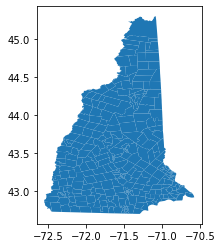

In [9]:
gdf = gpd.read_file('example-election-shapefiles/vest-nh-2016')
print(gdf.plot())

In [10]:
gdf.head(2)

,STATEFP,COUNTYFP,VTDST,NAMELSAD,NAME,G16PRERTRU,G16PREDCLI,G16PRELJOH,G16PREGSTE,G16PREOFUE,...,G16USSRAYO,G16USSDHAS,G16USSLCHA,G16USSIDAY,G16USSOWRI,G16GOVRSUN,G16GOVDVAN,G16GOVLABR,G16GOVOWRI,geometry
0,33,001,ALTO01,TOWN OF ALTON Voting District,TOWN OF ALTON,2201,1152,115,24,2,...,2204,1192,49,69,0,2166,1163,135,14,"POLYGON Z ((-71.34362 43.62879 0.00000, -71.34..."
1,33,001,BARN01,TOWN OF BARNSTEAD Voting District,TOWN OF BARNSTEAD,1520,924,125,20,0,...,1454,1033,52,62,0,1454,1017,116,0,"POLYGON Z ((-71.34905 43.34658 0.00000, -71.34..."


In [11]:
state_report, county_report_lst = verify.verify_state(gdf, 'NH', 'VEST', '2016')

d_col :  G16PREDCLI
r_col :  G16PRERTRU
GerryChain graph created


AssertionError: 

This assertion error is telling us that we are missing a GEOID column and the script was unable to assign it automatically. Luckily, this NH GeoDataFrame already has the two consitutents of a GEOID:
* STATEFP
* COUNTFP

So we can create a GEOID column manually like so:

In [ ]:
gdf['GEOID'] = gdf['STATEFP'].map(str) + gdf['COUNTYFP'].map(str)
gdf.GEOID.head(5)

In [ ]:
report_file_path = 'vest-new-hampshire-2016'
state_report, county_report_lst = verify.verify_state(gdf, 'NH', 'VEST', '2016',path=report_file_path)

Great! Now let's see what that report looks like (contents of `vest-new-hampshire-2016.md`):


# Election Shapefile Verification Report

[Open Precincts Verification Script](https://github.com/OpenPrecincts/verification)

[Verification Report Breakdown](https://github.com/OpenPrecincts/verification#verification-report-fields)
## Statewide Reports

### Quality Scores:
|                                                                                                            |            |
|:-----------------------------------------------------------------------------------------------------------|-----------:|
| [vote_score](https://github.com/OpenPrecincts/verification#vote-score)                                     | 1          |
| [county_vote_score_dispersion](https://github.com/OpenPrecincts/verification#county-vote-score-dispersion) | 0          |
| [vote_score](https://github.com/OpenPrecincts/verification#vote-score)                                     | 1          |
| [median_county_area_difference_score](https://github.com/OpenPrecincts/verification#area-difference-score) | 0.00107231 |
| [worst_county_area_difference_score](https://github.com/OpenPrecincts/verification#area-difference-score)  | 0.0869853  |

### Library Compatibility:
|                    |    |
|:-------------------|---:|
| can_use_maup       |  ✅ |
| can_use_gerrychain |  ✅ |

### Raw Data:
|                               |          |
|:------------------------------|:---------|
| all_precincts_have_a_geometry | ✅       |
| n_votes_democrat_expected     | 348526.0 |
| n_votes_republican_expected   | 345790.0 |
| n_two_party_votes_expected    | 694316.0 |
| n_votes_democrat_observed     | 348526   |
| n_votes_republican_observed   | 345790   |
| n_two_party_votes_observed    | 694316   |

## County Level Reports
|   geoid | name            |   vote_score |   area_difference_score |   n_votes_democrat_expected |   n_votes_republican_expected |   n_two_party_votes_expected |   n_votes_democrat_observed |   n_votes_republican_observed |   n_two_party_votes_observed |
|--------:|:----------------|-------------:|------------------------:|----------------------------:|------------------------------:|-----------------------------:|----------------------------:|------------------------------:|-----------------------------:|
|   33001 | Tilton town     |            1 |             0.00105878  |                       13517 |                         19315 |                        32832 |                       13517 |                         19315 |                        32832 |
|   33003 | Wolfeboro town  |            1 |             0.000835692 |                       12987 |                         14635 |                        27622 |                       12987 |                         14635 |                        27622 |
|   33005 | Winchester town |            1 |             0.00108585  |                       22064 |                         16876 |                        38940 |                       22064 |                         16876 |                        38940 |
|   33007 | Whitefield town |            1 |             0.00199538  |                        6563 |                          7952 |                        14515 |                        6563 |                          7952 |                        14515 |
|   33009 | Woodstock town  |            1 |             0.000988192 |                       28510 |                         19010 |                        47520 |                       28510 |                         19010 |                        47520 |
|   33011 | Windsor town    |            1 |             0.000521307 |                       99589 |                        100013 |                       199602 |                       99589 |                        100013 |                       199602 |
|   33013 | Wilmot town     |            1 |             0.000487777 |                       40198 |                         37674 |                        77872 |                       40198 |                         37674 |                        77872 |
|   33015 | Windham town    |            1 |             0.0869853   |                       79994 |                         90447 |                       170441 |                       79994 |                         90447 |                       170441 |
|   33017 | Strafford town  |            1 |             0.00270899  |                       34894 |                         29072 |                        63966 |                       34894 |                         29072 |                        63966 |
|   33019 | Washington town |            1 |             0.00146217  |                       10210 |                         10796 |                        21006 |                       10210 |                         10796 |                        21006 |


In a less trivial case, you may have the county names, but not their FIPS code. Let's consider VEST's Washington 2016:

In [ ]:
gdf = gpd.read_file('example-election-shapefiles/vest-wa-2016')
print(gdf.plot())
gdf.head(2)

In [ ]:
from reference_data import state_fip_to_geoid_to_county_name
washington_state_fips_code = 53
geoid_to_county_name = state_fip_to_geoid_to_county_name[53]
geoid_to_county_name

In [ ]:
gdf['GEOID'] = gdf['COUNTY'].apply(lambda x: geoid_to_county_name[x + " County"])
print(gdf.GEOID.unique())
gdf.head(2)

Now Washington has a GEOID column and can be run through the verification script.

## Example #3 - Manual Candidate Column Selection
The script needs to know which column contains votes for Clinton and which column contains votes for Trump. They can be manually entered as arguments:

* `d_col` denotes the column for Hillary Clinton vote counts in each precinct
* `r_col` denotes the column for Donald Trump vote counts in each precinct.

Without those arguments, the script will guess based on the expected number of votes for each candidate.

In [ ]:
gdf = gpd.read_file('example-election-shapefiles/mggg-vt-2016')
print(gdf.plot())
gdf.head(2)

In [ ]:
report_file_path = 'mggg-vermont-2016'
state_report, county_report_lst = verify.verify_state(gdf, 'VT', 'MGGG', '2016',path=report_file_path)

None of those look right, so we will have to pass the correct columns as arguements.

In [ ]:
gdf.columns

In [ ]:
d_col = 'PRES16D'
r_col = 'PRES16R'
state_report, county_report_lst = verify.verify_state(gdf, 'VT', 'MGGG', '2016', d_col=d_col, r_col=r_col, path=report_file_path)

`mggg-vermont-2016.md` content:


# Election Shapefile Verification Report

[Open Precincts Verification Script](https://github.com/OpenPrecincts/verification)

[Verification Report Breakdown](https://github.com/OpenPrecincts/verification#verification-report-fields)
## Statewide Reports

### Quality Scores:
|                                                                                                            |           |
|:-----------------------------------------------------------------------------------------------------------|----------:|
| [vote_score](https://github.com/OpenPrecincts/verification#vote-score)                                     | 1         |
| [county_vote_score_dispersion](https://github.com/OpenPrecincts/verification#county-vote-score-dispersion) | 0         |
| [vote_score](https://github.com/OpenPrecincts/verification#vote-score)                                     | 1         |
| [median_county_area_difference_score](https://github.com/OpenPrecincts/verification#area-difference-score) | 0.0011365 |
| [worst_county_area_difference_score](https://github.com/OpenPrecincts/verification#area-difference-score)  | 0.322525  |

### Library Compatibility:
|                    |    |
|:-------------------|---:|
| can_use_maup       |  ✅ |
| can_use_gerrychain |  ✅ |

### Raw Data:
|                               |          |
|:------------------------------|:---------|
| all_precincts_have_a_geometry | ✅       |
| n_votes_democrat_expected     | 178573.0 |
| n_votes_republican_expected   | 95369.0  |
| n_two_party_votes_expected    | 273942.0 |
| n_votes_democrat_observed     | 178573   |
| n_votes_republican_observed   | 95369    |
| n_two_party_votes_observed    | 273942   |

## County Level Reports
|   geoid | name              |   vote_score |   area_difference_score |   n_votes_democrat_expected |   n_votes_republican_expected |   n_two_party_votes_expected |   n_votes_democrat_observed |   n_votes_republican_observed |   n_two_party_votes_observed |
|--------:|:------------------|-------------:|------------------------:|----------------------------:|------------------------------:|-----------------------------:|----------------------------:|------------------------------:|-----------------------------:|
|   50005 | Wheelock town     |            1 |             0.00135788  |                        6445 |                          5534 |                        11979 |                        6445 |                          5534 |                        11979 |
|   50001 | Whiting town      |            1 |             0.000915124 |                       11219 |                          5297 |                        16516 |                       11219 |                          5297 |                        16516 |
|   50009 | Warren's gore     |            1 |             0.322525    |                        1019 |                          1506 |                         2525 |                        1019 |                          1506 |                         2525 |
|   50011 | Swanton town      |            1 |             0.000518428 |                        9351 |                          8752 |                        18103 |                        9351 |                          8752 |                        18103 |
|   50015 | Wolcott town      |            1 |             0.000738848 |                        7241 |                          3570 |                        10811 |                        7241 |                          3570 |                        10811 |
|   50021 | West Rutland town |            1 |             0.000841367 |                       13635 |                         12479 |                        26114 |                       13635 |                         12479 |                        26114 |
|   50027 | Woodstock town    |            1 |             0.000791351 |                       17556 |                          8605 |                        26161 |                       17556 |                          8605 |                        26161 |
|   50025 | Windham town      |            1 |             0.0376398   |                       14340 |                          5454 |                        19794 |                       14340 |                          5454 |                        19794 |
|   50013 | South Hero town   |            1 |             0.00182573  |                        2094 |                          1487 |                         3581 |                        2094 |                          1487 |                         3581 |
|   50023 | Worcester town    |            1 |             0.000878697 |                       18594 |                          7993 |                        26587 |                       18594 |                          7993 |                        26587 |
|   50007 | Winooski city     |            1 |             0.00850849  |                       54814 |                         18601 |                        73415 |                       54814 |                         18601 |                        73415 |
|   50017 | Williamstown town |            1 |             0.00171775  |                        7541 |                          5007 |                        12548 |                        7541 |                          5007 |                        12548 |
|   50019 | Westmore town     |            1 |             0.000741648 |                        5185 |                          5159 |                        10344 |                        5185 |                          5159 |                        10344 |
|   50003 | Woodford town     |            1 |             0.0707742   |                        9539 |                          5925 |                        15464 |                        9539 |                          5925 |                        15464 |


That's it! You may need to combine the method used in example 2 and example 3 in some cases, but hopefully most states will work like example #1. Happy Verifying :)